In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../data/preprocessed_data_s_p_speedup.csv')

In [3]:
data.drop(columns={'Overhead','Vanilla_time','Speedup'}, inplace=True)

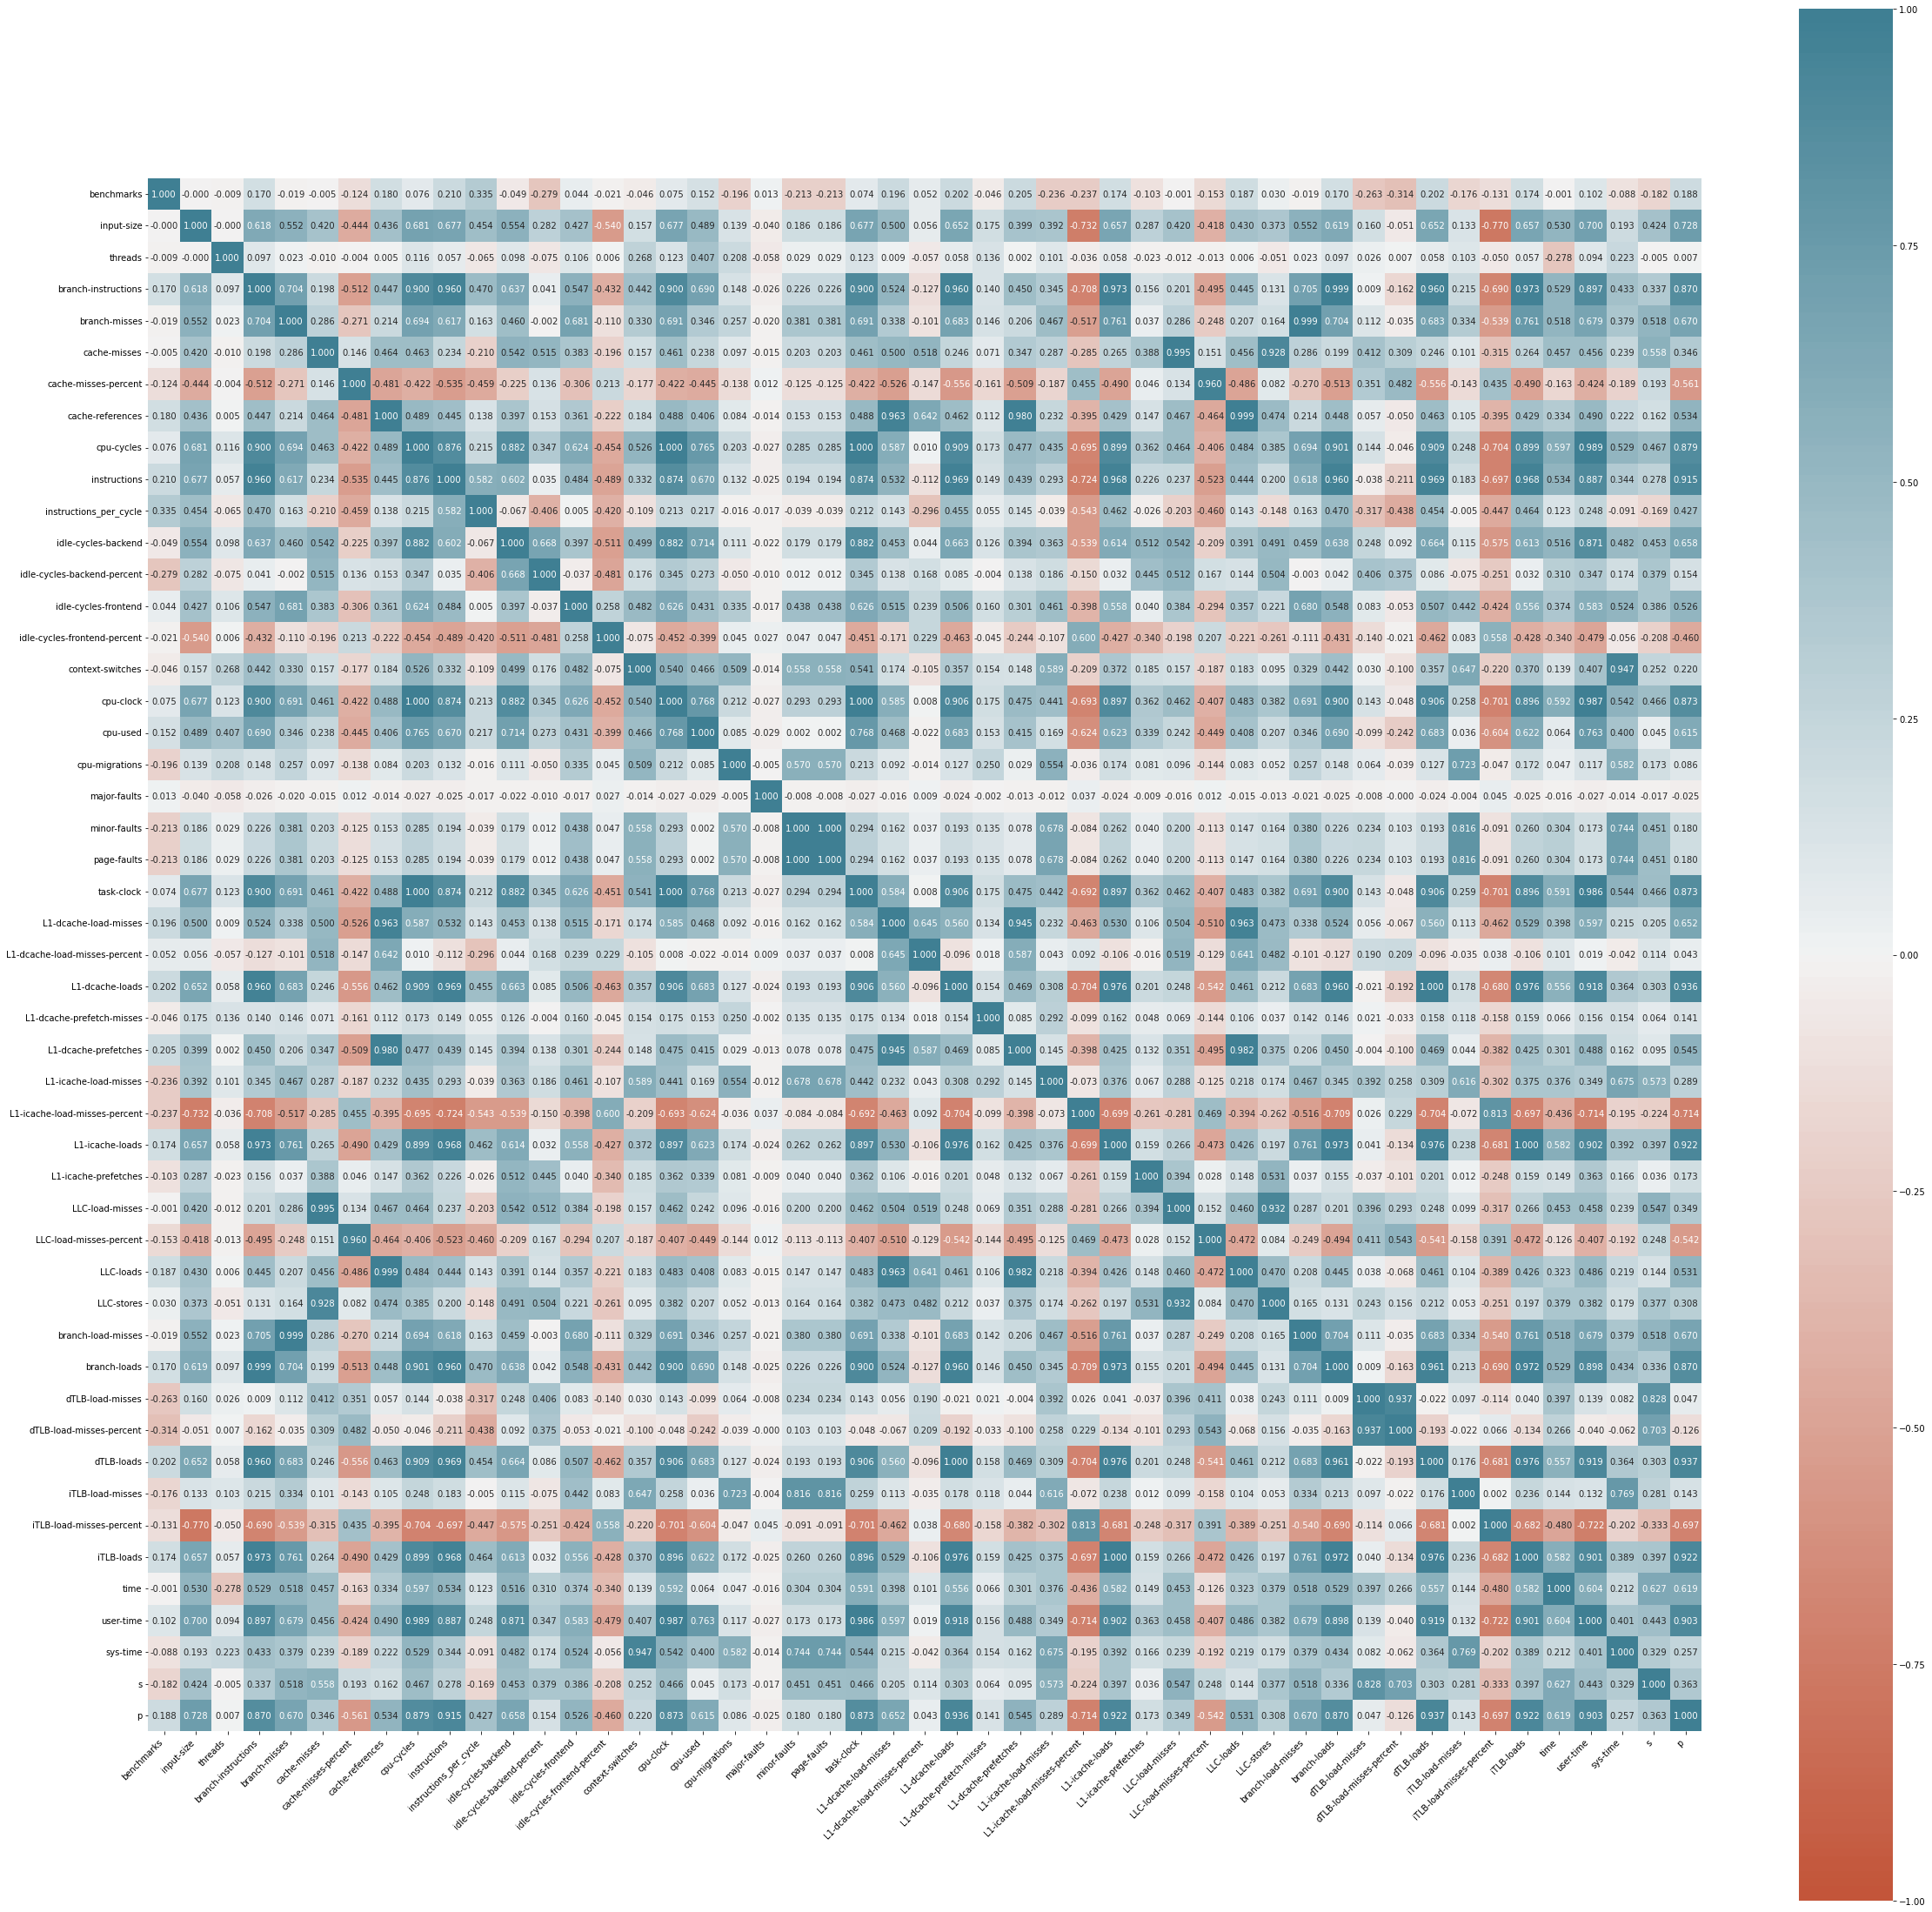

In [4]:
# plot correlation matrix
fig, ax = plt.subplots(figsize=(40, 40))

ax = sns.heatmap(
    data.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True,fmt=".3f"
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [5]:
unstack_corr = data.corr().unstack()

In [6]:
# select features for predicting s (correlation > 0.46)
output_s = ['s']
lst_s = []

for i in output_s:
    corr_table = unstack_corr[abs(unstack_corr)>0.46][i].drop(output_s, errors='ignore')
    lst_s = *lst_s,*corr_table.index

print('correlated variables')
print(set(lst_s))

correlated variables
{'cpu-clock', 'cache-misses', 'LLC-load-misses', 'time', 'dTLB-load-misses-percent', 'branch-load-misses', 'dTLB-load-misses', 'task-clock', 'branch-misses', 'cpu-cycles', 'L1-icache-load-misses'}


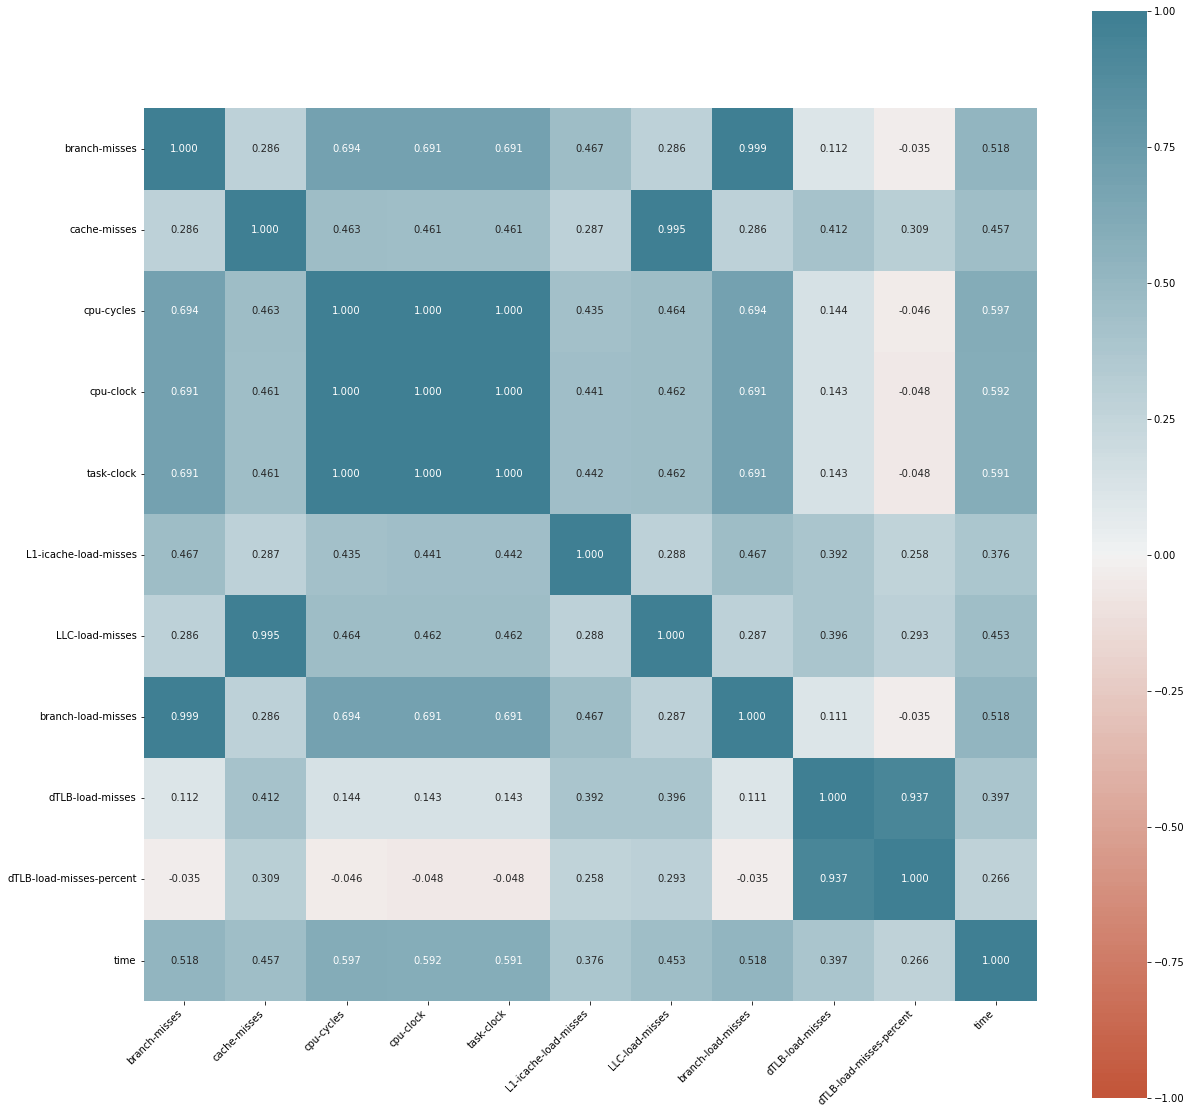

In [7]:
fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.heatmap(
    data[list(lst_s)].corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True,fmt=".3f"
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [8]:
# get rid of highly inter-correlated features
output_s_filtered = ['s', 'cpu-clock', 'dTLB-load-misses-percent', 
                     'task-clock', 'LLC-load-misses', 'branch-misses']
lst_s_filtered = []

for i in output_s:
    print(i+' correlation')
    corr_table = unstack_corr[abs(unstack_corr)>0.46][i].drop(output_s_filtered, errors='ignore')
    lst_s_filtered = *lst_s_filtered,*corr_table.index
    print(corr_table)
    print('\n')

print('correlated variables')
print(set(lst_s_filtered))

s correlation
cache-misses             0.558046
cpu-cycles               0.467348
L1-icache-load-misses    0.573311
branch-load-misses       0.518001
dTLB-load-misses         0.827694
time                     0.627464
dtype: float64


correlated variables
{'cache-misses', 'time', 'branch-load-misses', 'dTLB-load-misses', 'cpu-cycles', 'L1-icache-load-misses'}


In [9]:
# select features for predicting s (correlation > 0.6)
output_p = ['p']
lst_p = []

for i in output_p:
    corr_table = unstack_corr[abs(unstack_corr)>0.6][i].drop(output_p, errors='ignore')
    lst_p = *lst_p,*corr_table.index

print('correlated variables')
print(set(lst_p))

correlated variables
{'dTLB-loads', 'branch-load-misses', 'iTLB-loads', 'cpu-clock', 'input-size', 'idle-cycles-backend', 'L1-icache-loads', 'branch-misses', 'instructions', 'iTLB-load-misses-percent', 'L1-icache-load-misses-percent', 'L1-dcache-loads', 'branch-instructions', 'cpu-used', 'cpu-cycles', 'user-time', 'time', 'L1-dcache-load-misses', 'branch-loads', 'task-clock'}


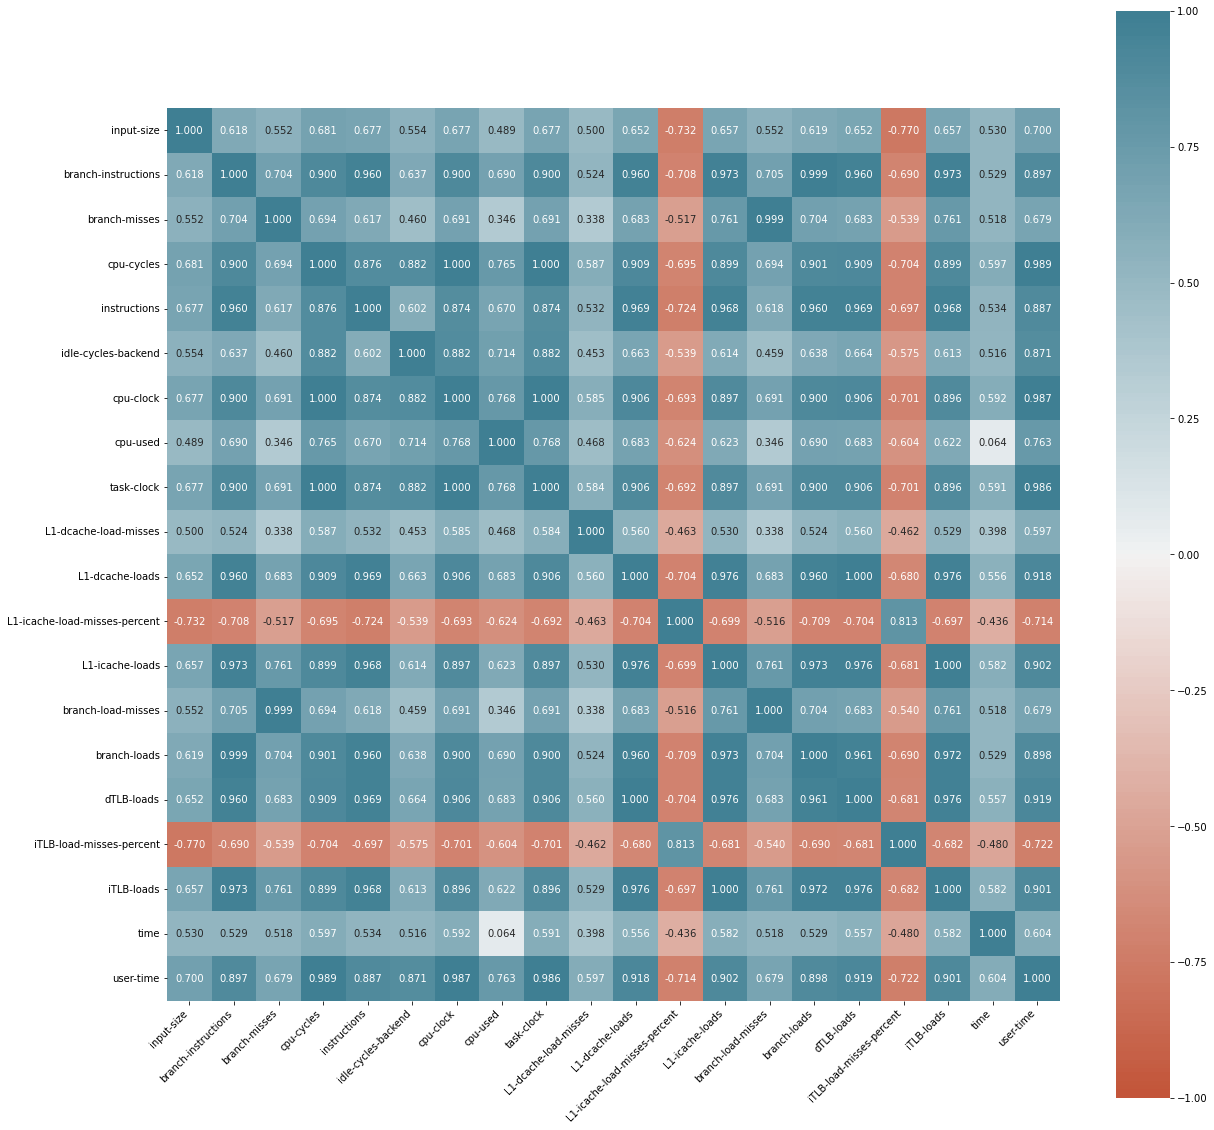

In [10]:
fig, ax = plt.subplots(figsize=(20, 20))

ax = sns.heatmap(
    data[list(lst_p)].corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,annot=True,fmt=".3f"
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [11]:
# get rid of highly inter-correlated features
output_p_filtered = ['p','user-time', 'branch-instructions', 'cpu-clock', 'L1-dcache-loads', 
                     'branch-loads', 'L1-icache-load-misses-percent', 'instructions',
                     'task-clock', 'L1-icache-loads', 'cpu-cycles', 'iTLB-load-misses-percent', 
                     'input-size', 'iTLB-loads', 'idle-cycles-backend', 'branch-misses']
lst_p_filtered = []

for i in output_p:
    print(i+' correlation')
    corr_table = unstack_corr[abs(unstack_corr)>0.6][i].drop(output_p_filtered, errors='ignore')
    lst_p_filtered = *lst_p_filtered,*corr_table.index
    print(corr_table)
    print('\n')

print('correlated variables')
print(set(lst_p_filtered))

p correlation
cpu-used                 0.615492
L1-dcache-load-misses    0.651627
branch-load-misses       0.670280
dTLB-loads               0.936532
time                     0.619230
dtype: float64


correlated variables
{'dTLB-loads', 'time', 'branch-load-misses', 'L1-dcache-load-misses', 'cpu-used'}


In [12]:
new_data_s = data[[*set(lst_s_filtered),*output_s]]
new_data_p = data[[*set(lst_p_filtered),*output_p]]

In [13]:
new_data_s.to_csv('../data/dataset_s.csv',index = False)
new_data_p.to_csv('../data/dataset_p.csv',index = False)